<a href="https://colab.research.google.com/github/FerJGit/TT-2C2025-Data-Analitycs-Notebooks/blob/main/After_class_4/Mis_Archivos/After_Class_Datos_nulos_y_duplicados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos Nulos y Duplicados
**Objetivo:**
* Familiarizarse con la identificación de valores nulos en un DataFrame.
* Reconocer y contar duplicados en un conjunto de datos.


# Datos Nulos




**Instrucciones:**

1. Descargar el siguiente conjunto de datos: [satis_clientes.csv](https://drive.google.com/file/d/169MG1sSG8IqTtLdJwIlnBOhMkF_CN_Tb/view?usp=drive_link).
2. Cargar los datos en un DataFrame en Python usando Pandas.
Utilizar el método `isnull()` para identificar las filas con datos faltantes y contar el número de valores nulos por columna.
3. Usar el método `duplicated()` para identificar las filas duplicadas y contar cuántas filas duplicadas hay en total.
4. Crear un informe que incluya:
  * La cantidad total de registros en el DataFrame.
  * La cantidad total de valores nulos por columna.
  * La cantidad de filas duplicadas.
  * Un subconjunto de los registros duplicados para que se vea el contenido.  



## Ver en documentación oficial

[Pandas Working with missing data](https://pandas.pydata.org/docs/user_guide/missing_data.html)
[NumPy Data Types](https://numpy.org/doc/2.3/user/basics.types.html)

**Sobre NULL**

* NULL es la representación en bases de datos SQL.
* Cuando importás datos a pandas (ej: con pd.read_sql o pd.read_csv), esos NULL se convierten en NaN o NaT dentro de pandas.
* En pandas casi siempre vas a ver NaN (nulos numéricos/objetos) o NaT (nulos de tiempo).
* No vas a ver NULL directamente, salvo en la base de datos antes de importar.

## Veamos algunos comandos antes de comenzar
De forma similar a numpy, pandas también tiene algunas funciones útiles para identificar y detectar valores nulos.

In [ ]:
import numpy as np
import pandas as pd

La función pd.isnulll() detecta valores nulos (como NaN, None, etc.) y devuelve True si el valor es nulo, o False si no lo es.

In [ ]:
na = np.nan
print(type(na))


<class 'float'>


In [ ]:
pd.isnull(np.nan)

True

In [ ]:
pd.isnull(None)

True

La función pd.isna() en pandas se utiliza para detectar valores nulos (missing values) en objetos, como NaN, None, etc.

In [ ]:
pd.isna(np.nan)

True

In [ ]:
pd.isna(None)

True

También podemos usarlo con Series

In [ ]:
pd.isnull(pd.Series([1, np.nan, 7]))

,0
0,False
1,True
2,False


O incluso con Dataframes

In [ ]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


## Veamos un ejemplo

In [ ]:
# Al ejecutar este bloque, Google nos solicitará los permisos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Para facilitar las tareas, podemos cambiar la ruta de trabajo con el método chdir() de la librería os de python.
import os
os.chdir('/content/drive/MyDrive/datasets')
# os.chdir('/content/drive/My Drive/{mi ruta de carpetas}')
!ls # muestra el contenido de la carpeta

booking_db_nulls.sqlite			   Prueba.xlsx
booking_db.sqlite			   reviews.csv
hotels.csv				   satis_clientes.csv
international-hotel-booking-analytics.zip  users.csv
netflix-shows.zip			   ventas.csv
netflix_titles.csv


In [ ]:
import pandas as pd

# Cargar datos
df = pd.read_csv('satis_clientes.csv')
df.head()

,id,Empresa,Fecha,Calificación,Comentarios
0,1,Mitchell Group,11/12/2024,1.0,Integer ac leo. Pellentesque ultrices mattis o...
1,2,Kuhn-Fay,25/01/2024,4.0,Vestibulum ac est lacinia nisi venenatis trist...
2,3,Moen-Blick,11/11/2024,3.0,Aliquam quis turpis eget elit sodales sceleris...
3,4,McDermott Inc,01/12/2024,1.0,NaN
4,5,Keebler Inc,12/01/2024,4.0,Integer ac leo. Pellentesque ultrices mattis o...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1128 non-null   int64  
 1   Empresa       1128 non-null   object 
 2   Fecha         1128 non-null   object 
 3   Calificación  904 non-null    float64
 4   Comentarios   818 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 44.2+ KB


Si bien lo vamos a ver más adelante, asi podemos cambiar el tipo de dato de una columna
* [Pandas data type](https://numpy.org/doc/2.3/user/basics.types.html#)
* [Caracter data type](https://numpy.org/doc/2.3/reference/arrays.dtypes.html#arrays-dtypes-constructing)

In [ ]:
df["id"] = df["id"].astype("i")

In [ ]:
df["Empresa"] = df["Empresa"].astype("string")

Usamos el método isnull que retorna un dataframe de iguales dimensiones, con True donde la celda es NaN y False en caso contrario

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1128 non-null   int32  
 1   Empresa       1128 non-null   string 
 2   Fecha         1128 non-null   object 
 3   Calificación  904 non-null    float64
 4   Comentarios   818 non-null    object 
dtypes: float64(1), int32(1), object(2), string(1)
memory usage: 39.8+ KB


In [ ]:
df.isnull()

,id,Empresa,Fecha,Calificación,Comentarios
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,False
...,...,...,...,...,...
1123,False,False,False,False,False
1124,False,False,False,True,False
1125,False,False,False,False,True
1126,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
id,0
Empresa,0
Fecha,0
Calificación,224
Comentarios,310


In [ ]:
# Asi listamos los valores con alguna celda nula
df[df.isnull().any(axis=1)]

,id,Empresa,Fecha,Calificación,Comentarios
3,4,McDermott Inc,01/12/2024,1.0,NaN
6,7,Moen-Hartmann,11/03/2024,NaN,NaN
7,8,Lubowitz and Sons,27/01/2024,NaN,"Donec diam neque, vestibulum eget, vulputate u..."
8,9,Waters-Lakin,04/09/2024,NaN,NaN
9,10,Legros-Olson,12/11/2024,5.0,NaN
...,...,...,...,...,...
1121,995,Altenwerth LLC,13/09/2024,NaN,NaN
1122,995,Altenwerth LLC,13/09/2024,NaN,NaN
1124,997,"Schimmel, Gleichner and O'Keefe",25/12/2024,NaN,In hac habitasse platea dictumst. Morbi vestib...
1125,998,"Strosin, Tromp and Dicki",23/05/2024,4.0,NaN


# Datos duplicados

In [ ]:
# Cargar datos
df = pd.read_csv('satis_clientes.csv')
df.head()

In [ ]:
# Identificar duplicados
duplicados = df.duplicated()
cantidad_duplicados = duplicados.sum()
print(f'Duplicados:\n{duplicados}')
print(f'Cantidad de duplicados: {cantidad_duplicados}')

Duplicados:
0       False
1       False
2       False
3       False
4       False
        ...  
1123    False
1124    False
1125    False
1126    False
1127    False
Length: 1128, dtype: bool
Cantidad de duplicados: 128


In [ ]:
# Crear subconjunto de duplicados
registros_duplicados = df[duplicados]
# Mostrar en consola

print(f'\nCantidad total de registros: {len(df)}')
print(f'Cantidad de registros duplicados: {cantidad_duplicados}')
print(registros_duplicados.head())


Cantidad total de registros: 1128
Cantidad de registros duplicados: 128
    id                          Empresa       Fecha  Calificación  \
10  10                     Legros-Olson  12/11/2024           5.0   
12  11                     Harris-Davis  13/11/2024           1.0   
18  16  White, Balistreri and Daugherty  29/06/2024           5.0   
45  42                 Keebler and Sons  28/09/2024           5.0   
48  44                  Erdman-Parisian  07/03/2024           2.0   

                                          Comentarios  
10                                                NaN  
12  Nullam sit amet turpis elementum ligula vehicu...  
18                                                NaN  
45                                                NaN  
48  Curabitur in libero ut massa volutpat convalli...  


In [ ]:
registros_duplicados.dtypes

,0
id,int32
Empresa,string[python]
Fecha,object
Calificación,float64
Comentarios,object


In [ ]:
duplicado_10 = df["id"].duplicated()
print(duplicado_10)

0       False
1       False
2       False
3       False
4       False
        ...  
1123    False
1124    False
1125    False
1126    False
1127    False
Name: id, Length: 1128, dtype: bool


# Actividad 2: Exploración y limpieza preliminar con Python.
**Contexto**
En esta actividad, trabajarás guiado por Luis, nuestro Analista de BI, con una planilla de Google Sheets que registra la temperatura corporal de un grupo de personas durante 10 días. Debes realizar un examen preliminar para identificar datos problemáticos, como duplicados y valores nulos. Esta práctica te ayudará a dar los pasos previos a la limpieza de datos, un componente vital en cualquier proyecto de análisis.

**Objetivos**
* Identificar los datos duplicados y nulos en el conjunto.
* Analizar el mejor tratamiento para los datos anómalos y nulos.

**Ejercicio práctico**
1. Crear un dataframe a partir de la planilla de cálculo y efectuar un examen preliminar.
2. Identificar los datos:

  a. duplicados

  b. nulos
3. Analizá cuál sería el mejor tratamiento para los datos anómalos (fuera de rango) y nulos en los siguientes contextos **(YA RESUELTO)**:

<center><img src="https://drive.google.com/uc?id=1CaYiA8Sc5Z1KPEA6NZ2DYWuCzaihZ6BQ"></center>

**Sets de datos**
* [Actividad 2](https://docs.google.com/spreadsheets/d/1-rUn4TUwpGrLE1DH8moeiR5eSyeF-jOOTpfhRgZxVIQ/edit?usp=sharing)

**¿Por qué importa esto en SynthData?**

La exploración y limpieza de datos son pasos esenciales para garantizar que cualquier análisis posterior sea robusto y significativo. En SynthData, nos enfrentamos a datos en diferentes formatos, y es crucial asegurarnos de que estén listos para ser analizados. Esta actividad te enseñará a detectar problemas comunes en conjuntos de datos, como duplicados y valores nulos, y cómo abordarlos adecuadamente.



### 1) Crear el dataframe

In [30]:
# importar la librería
# crear el dataframe
# probar que se haya cargado el dataframe
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1-rUn4TUwpGrLE1DH8moeiR5eSyeF-jOOTpfhRgZxVIQ/gviz/tq?tqx=out:csv&sheet=')
df.head()

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,Marcellus Antosik,36.85,36.01,37.36,37.85,36.31,36.55,36.71,37.79,36.44,36.86
1,Olia Thomson,36.06,36.42,36.16,36.03,36.00,36.08,37.45,37.92,37.53,36.54
2,Almeta Meredith,36.89,37.74,36.16,36.59,37.93,37.12,36.34,36.04,NaN,37.05
3,Massimiliano Waller,36.50,37.91,NaN,36.16,37.41,37.73,36.57,37.94,36.03,36.80
4,Melody Fedynski,37.90,37.69,36.55,37.06,37.81,36.77,36.89,36.35,37.36,37.08


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

MessageError: Error: credential propagation was unsuccessful

###1.2) Exploración preliminar
Los métodos de exploración son esenciales para obtener una comprensión inicial de los datos y su estructura.
Algunos de los métodos más utilizados son:
* `df.head(n)`: muestra las primeras n filas del dataframe (por defecto n = 5).
* `df.tail(n)`: muestra las últimas n filas del dataframe.
* `df.info()`: proporciona un resumen del dataframe.
* `df.describe()`: genera estadísticas que veremos más adelante.
* `df.shape`: devuelve una tupla que contiene el número de filas y columnas del dataframe.
* `df.columns`: devuelve una lista de los nombre de las columnas del dataframe.
* `df.index`: devuelve los índices del dataframe.
* `df.dtypes`: devuelve los tipos de datos de cada columna.
* `df.isnull()`: devuelve un dataframe booleano que indica si hay valores nulos en el dataframe. Tiene una función inversa: `df.notnull()`.
* `df.value_counts()`: cuenta las ocurrencias de los valores de una serie.
* `df.unique()`: devuelve los valores únicos de una columna.
* `df.sample(n)`: devuelve una muestra aleatoria de n filas

In [ ]:
# Muestra de los 4 primeros registros
df.head(4)

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,Marcellus Antosik,36.85,36.01,37.36,37.85,36.31,36.55,36.71,37.79,36.44,36.86
1,Olia Thomson,36.06,36.42,36.16,36.03,36.00,36.08,37.45,37.92,37.53,36.54
2,Almeta Meredith,36.89,37.74,36.16,36.59,37.93,37.12,36.34,36.04,NaN,37.05
3,Massimiliano Waller,36.50,37.91,NaN,36.16,37.41,37.73,36.57,37.94,36.03,36.80


In [ ]:
# Muestra de los últimos 6 registros
df.tail(6)

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
3012,Cullin MacGuffog,37.17,37.60,36.34,36.53,37.24,36.67,37.88,36.07,36.12,36.01
3013,Marc Pullinger,36.07,37.73,36.29,37.37,36.31,36.73,36.65,36.48,37.62,37.13
3014,Marnia Carillo,NaN,36.93,36.47,38.00,37.94,36.93,NaN,36.01,37.02,37.51
3015,Vic Zanotti,37.19,36.49,37.24,37.10,36.27,37.42,36.92,36.54,37.13,37.02
3016,Hoyt Koenen,37.57,37.23,36.76,36.17,36.61,37.21,37.66,37.18,36.45,36.68
3017,Artus Simmill,37.09,36.26,36.25,36.27,36.72,37.28,37.19,37.13,37.89,36.42


In [ ]:
# Muestra los nombres de las columnas, cuántos valores hay en cada una, y qué tipo de dato contiene
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  3018 non-null   object 
 1   d1      2832 non-null   float64
 2   d2      2871 non-null   float64
 3   d3      2822 non-null   float64
 4   d4      2839 non-null   float64
 5   d5      2855 non-null   float64
 6   d6      2820 non-null   float64
 7   d7      2864 non-null   float64
 8   d8      2834 non-null   float64
 9   d9      2816 non-null   float64
 10  d10     2845 non-null   float64
dtypes: float64(10), object(1)
memory usage: 259.5+ KB


In [ ]:
print(pd.Series([1, np.nan, 7]).dtypes)

float64


In [ ]:
# Muestra el resumen estadístico de las columnas. Conteo, promedio, mínimo y máximo...
df.describe()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
count,2832.000000,2871.000000,2822.000000,2839.000000,2855.000000,2820.000000,2864.000000,2834.000000,2816.000000,2845.000000
mean,37.016910,36.989749,37.003487,37.001899,37.013440,37.000397,37.014745,37.003814,37.012035,36.997701
std,0.580133,0.581439,0.574085,0.576158,0.581639,0.582132,0.576455,0.568113,0.578429,0.578191
min,36.000000,36.000000,36.000000,36.010000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
25%,36.510000,36.480000,36.502500,36.500000,36.520000,36.490000,36.520000,36.520000,36.510000,36.500000
50%,37.025000,36.970000,37.020000,37.020000,37.030000,37.000000,37.025000,37.010000,37.020000,37.000000
75%,37.530000,37.490000,37.510000,37.490000,37.510000,37.500000,37.520000,37.490000,37.520000,37.500000
max,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000


In [ ]:
# Cantidad de registros y columnas
df.shape

(3018, 11)

In [ ]:
# Nombres de las columnas
df.columns

Index(['nombre', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10'], dtype='object')

In [ ]:
# Rango de los índices
df.index

RangeIndex(start=0, stop=3018, step=1)

In [ ]:
# Tipo de dato que hay en cada columna
df.dtypes

,0
nombre,object
d1,float64
d2,float64
d3,float64
d4,float64
d5,float64
d6,float64
d7,float64
d8,float64
d9,float64


In [ ]:
# Un dataframe que muestra True donde falta el dato
df.isnull()

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3013,False,False,False,False,False,False,False,False,False,False,False
3014,False,True,False,False,False,False,False,True,False,False,False
3015,False,False,False,False,False,False,False,False,False,False,False
3016,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Muestra cuántas veces se repiten los valores en cada columna
df['d1'].value_counts()

,count
d1,
37.86,25
37.17,25
37.42,23
37.58,22
36.07,21
...,...
37.08,7
36.54,6
36.00,6


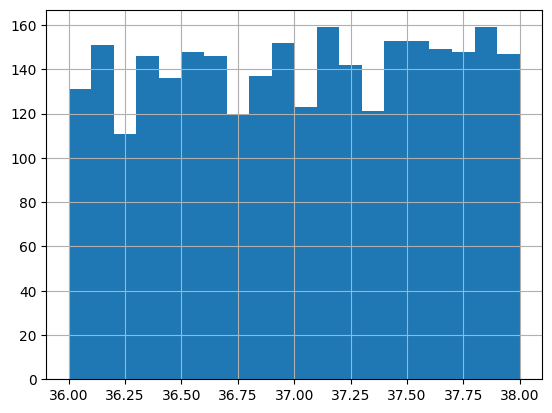

In [ ]:
import matplotlib.pyplot as plt
df['d1'].hist(bins=20)
plt.show()

In [ ]:
# Muestra los valores de una columna, sin repetidos
df['d1'].unique()

array([36.85, 36.06, 36.89, 36.5 , 37.9 , 36.47, 36.27, 37.59, 36.72,
       36.32, 36.79, 36.02, 37.23, 36.24, 36.73, 36.93, 37.76, 36.16,
       37.81, 37.31, 36.25, 36.23, 36.04, 36.97, 37.52, 36.77,   nan,
       37.48, 36.36, 36.12, 37.2 , 36.81, 37.43, 37.02, 36.52, 37.98,
       37.46, 36.55, 37.45, 36.07, 37.05, 36.91, 36.41, 36.05, 36.96,
       36.  , 36.11, 37.75, 37.87, 37.88, 37.63, 37.15, 36.49, 36.3 ,
       37.97, 38.  , 37.64, 37.41, 36.53, 36.68, 37.58, 37.55, 37.77,
       37.83, 36.33, 36.82, 36.98, 37.69, 36.29, 36.67, 37.65, 37.16,
       36.95, 37.71, 37.68, 37.86, 36.87, 36.48, 37.91, 36.61, 37.32,
       37.5 , 36.39, 37.18, 36.4 , 37.82, 36.03, 37.33, 37.84, 37.17,
       36.21, 37.51, 37.57, 37.78, 36.08, 37.99, 37.09, 36.84, 37.53,
       36.56, 37.44, 36.09, 37.34, 36.15, 36.64, 36.17, 36.63, 37.73,
       36.92, 36.1 , 37.1 , 37.24, 36.51, 36.76, 36.86, 36.75, 36.65,
       37.7 , 37.29, 36.8 , 37.42, 36.38, 37.94, 36.46, 37.39, 36.71,
       37.11, 37.25,

In [ ]:
# Muestra aleatoria de 10 registros
df.sample(10)

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
1709,Dicky Woodland,37.75,36.52,36.38,36.03,36.06,37.86,36.55,36.43,36.01,36.66
154,Beck Barday,36.92,37.47,36.64,36.66,37.73,NaN,37.27,36.61,36.77,37.43
2243,Marshall Aleveque,36.60,37.60,36.84,37.12,37.35,37.93,36.86,37.90,36.50,37.16
1372,Jocelyn Quantrill,36.30,37.14,NaN,37.24,36.28,36.95,NaN,36.02,36.88,36.07
1141,Alanah Nichol,37.19,37.94,37.34,37.60,36.71,37.31,36.43,37.25,36.41,36.03
773,Constancy Tregona,36.89,NaN,NaN,37.48,36.66,37.48,37.71,37.40,36.45,37.18
1312,Agace Botha,37.95,37.13,36.56,37.19,37.09,36.08,36.45,36.91,36.02,36.09
1031,Aeriell Jeans,36.30,36.12,37.29,37.03,36.85,37.09,37.43,37.27,36.98,NaN
1648,Virge Cowderay,36.69,37.58,37.36,37.88,36.58,37.28,37.68,NaN,37.44,36.85
954,Coleman Gorrissen,36.37,36.61,36.63,NaN,36.01,NaN,36.67,36.28,37.31,36.52


❓ ¿Podrías decir si hay valores nulos en este dataframe?

✨ En un primer análisis, ya podemos decir que hay valores nulos:
tanto `shape` como `index` indican que hay 3018 registros, pero `info()` nos da la pauta de que la única columna que no tiene valores nulos es la de nombres.

###2) Ubicar datos duplicados y nulos

#### Duplicados
Para trabajar con datos duplicados, el método principal es `duplicated()` que devuelve un valor booleano por cada fila, indicando si es duplicado o no. Devuelve `True`, si una fila es duplicado de alguna anterior.
* Con el parámetro `subset`, permite buscar duplicados en columnas específicas.
* Combinada con otras funciones, podemos obtener más resultados, por ejemplo, `df.duplicated().sum()` cuenta  la cantidad de filas duplicadas


In [ ]:
# Saber cuáles filas son duplicadas
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3013,False
3014,False
3015,False
3016,True


In [ ]:
# Contar la cantidad de filas duplicadas
print(df.duplicated().sum())

18


In [ ]:
# Visualizar las filas duplicadas
df[df.duplicated()]

,id,Empresa,Fecha,Calificación,Comentarios
10,10,Legros-Olson,12/11/2024,5.0,NaN
12,11,Harris-Davis,13/11/2024,1.0,Nullam sit amet turpis elementum ligula vehicu...
18,16,"White, Balistreri and Daugherty",29/06/2024,5.0,NaN
45,42,Keebler and Sons,28/09/2024,5.0,NaN
48,44,Erdman-Parisian,07/03/2024,2.0,Curabitur in libero ut massa volutpat convalli...
...,...,...,...,...,...
1096,973,Olson-Volkman,13/06/2024,2.0,Cum sociis natoque penatibus et magnis dis par...
1105,981,"Mraz, O'Hara and Schmidt",13/12/2024,2.0,Vestibulum ac est lacinia nisi venenatis trist...
1109,984,"Strosin, Raynor and Oberbrunner",14/02/2024,1.0,Morbi porttitor lorem id ligula. Suspendisse o...
1118,992,Donnelly-Bashirian,14/03/2024,NaN,Nullam porttitor lacus at turpis. Donec posuer...


In [ ]:
# Para un paciente dado, visualizar esas filas duplicadas
df[df["nombre"] == "Dagny Burree"]

# Si quiero por ejemplo el de 2 personas, sería así :
# df[df["nombre"].isin (["Dagny Burree","Sal Oury"])]


,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
73,Dagny Burree,37.58,36.17,37.0,37.84,37.29,37.54,36.07,36.75,NaN,36.53
136,Dagny Burree,37.58,36.17,37.0,37.84,37.29,37.54,36.07,36.75,NaN,36.53


Como poder visualizar todos los registros duplicados?
`df.duplicated(keep=???)`
* keep='first' (default) → solo las repeticiones después de la primera son True.
* keep='last' → solo las repeticiones antes de la última son True.
* keep=False → todas las ocurrencias de un duplicado son True.

In [ ]:
# Asi puedo visualizar los registros
df[df.duplicated(keep=False)]

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
13,Merola Muscat,36.24,37.19,37.16,37.66,36.88,37.80,36.04,37.47,38.00,36.92
42,Holden Kerry,36.07,37.11,36.58,NaN,36.41,36.63,36.60,36.70,36.51,37.53
73,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53
85,Ailyn Hexter,36.67,36.10,36.36,36.59,36.99,37.22,36.34,37.51,36.72,37.59
136,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53
216,Paige Catherine,37.55,36.08,37.17,36.72,36.01,36.42,37.97,37.66,36.12,37.77
235,Merola Muscat,36.24,37.19,37.16,37.66,36.88,37.80,36.04,37.47,38.00,36.92
280,Ginger Iacoviello,36.06,37.71,36.05,36.88,NaN,36.37,37.15,36.90,37.03,37.61
306,Bernarr D'Arrigo,36.83,36.94,NaN,36.01,37.80,37.94,36.30,37.97,37.75,37.35
453,Celeste Gooch,36.11,36.87,36.68,NaN,37.92,36.72,37.93,37.29,36.15,36.60


In [ ]:
# Se puede mejorar aún ordenando los datos
df[df.duplicated(keep=False)].sort_values(by="nombre")

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
2200,Ailyn Hexter,36.67,36.10,36.36,36.59,36.99,37.22,36.34,37.51,36.72,37.59
85,Ailyn Hexter,36.67,36.10,36.36,36.59,36.99,37.22,36.34,37.51,36.72,37.59
1352,Andriana Mossman,37.40,36.81,37.46,36.89,36.22,36.40,37.97,36.07,37.86,NaN
1528,Andriana Mossman,37.40,36.81,37.46,36.89,36.22,36.40,37.97,36.07,37.86,NaN
847,Bernarr D'Arrigo,36.83,36.94,NaN,36.01,37.80,37.94,36.30,37.97,37.75,37.35
306,Bernarr D'Arrigo,36.83,36.94,NaN,36.01,37.80,37.94,36.30,37.97,37.75,37.35
453,Celeste Gooch,36.11,36.87,36.68,NaN,37.92,36.72,37.93,37.29,36.15,36.60
2954,Celeste Gooch,36.11,36.87,36.68,NaN,37.92,36.72,37.93,37.29,36.15,36.60
136,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53
73,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53


In [ ]:
# Saber si las columnas d4, d5 y d6 tienen valos duplicados
df.duplicated(subset=["d4","d5","d6"])

,0
0,False
1,False
2,False
3,False
4,False
...,...
3013,False
3014,False
3015,False
3016,True


In [ ]:
df[df.duplicated(subset=["d4","d5","d6"], keep="last")]

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
13,Merola Muscat,36.24,37.19,37.16,37.66,36.88,37.80,36.04,37.47,38.00,36.92
42,Holden Kerry,36.07,37.11,36.58,NaN,36.41,36.63,36.60,36.70,36.51,37.53
73,Dagny Burree,37.58,36.17,37.00,37.84,37.29,37.54,36.07,36.75,NaN,36.53
85,Ailyn Hexter,36.67,36.10,36.36,36.59,36.99,37.22,36.34,37.51,36.72,37.59
216,Paige Catherine,37.55,36.08,37.17,36.72,36.01,36.42,37.97,37.66,36.12,37.77
280,Ginger Iacoviello,36.06,37.71,36.05,36.88,NaN,36.37,37.15,36.90,37.03,37.61
306,Bernarr D'Arrigo,36.83,36.94,NaN,36.01,37.80,37.94,36.30,37.97,37.75,37.35
453,Celeste Gooch,36.11,36.87,36.68,NaN,37.92,36.72,37.93,37.29,36.15,36.60
508,Hoyt Koenen,37.57,37.23,36.76,36.17,36.61,37.21,37.66,37.18,36.45,36.68
741,Marijn Lothean,37.89,37.06,37.05,37.05,37.32,37.78,36.97,37.84,37.62,37.78


In [ ]:
df.value_counts()

,,,,,,,,,,,count
nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,
Pascal Merfin,37.14,36.31,37.61,37.12,37.28,36.43,37.39,36.69,37.83,37.17,2
Hoyt Koenen,37.57,37.23,36.76,36.17,36.61,37.21,37.66,37.18,36.45,36.68,2
Marijn Lothean,37.89,37.06,37.05,37.05,37.32,37.78,36.97,37.84,37.62,37.78,2
Read Wemyss,36.79,36.00,37.50,36.82,37.13,37.94,37.63,37.81,37.71,37.28,2
Paige Catherine,37.55,36.08,37.17,36.72,36.01,36.42,37.97,37.66,36.12,37.77,2
...,...,...,...,...,...,...,...,...,...,...,...
Faulkner Pember,36.31,36.92,37.23,37.50,36.50,37.32,37.57,36.30,37.60,36.26,1
Farrah Lowndesbrough,36.59,36.20,37.84,37.28,37.93,37.71,37.01,37.89,37.08,37.32,1
Farra Bentall,37.31,36.96,37.51,36.47,37.21,37.89,36.77,36.55,36.28,37.24,1


Anticipo de lo que veremos sobre tratamiento de duplicados

In [ ]:
df_sin_dup = df.drop_duplicates()            # Borra duplicados, conserva la primera
# df.drop_duplicates(keep="last") # Conserva la última y borra la primera

In [ ]:
df_sin_dup

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,Marcellus Antosik,36.85,36.01,37.36,37.85,36.31,36.55,36.71,37.79,36.44,36.86
1,Olia Thomson,36.06,36.42,36.16,36.03,36.00,36.08,37.45,37.92,37.53,36.54
2,Almeta Meredith,36.89,37.74,36.16,36.59,37.93,37.12,36.34,36.04,NaN,37.05
3,Massimiliano Waller,36.50,37.91,NaN,36.16,37.41,37.73,36.57,37.94,36.03,36.80
4,Melody Fedynski,37.90,37.69,36.55,37.06,37.81,36.77,36.89,36.35,37.36,37.08
...,...,...,...,...,...,...,...,...,...,...,...
3012,Cullin MacGuffog,37.17,37.60,36.34,36.53,37.24,36.67,37.88,36.07,36.12,36.01
3013,Marc Pullinger,36.07,37.73,36.29,37.37,36.31,36.73,36.65,36.48,37.62,37.13
3014,Marnia Carillo,NaN,36.93,36.47,38.00,37.94,36.93,NaN,36.01,37.02,37.51
3015,Vic Zanotti,37.19,36.49,37.24,37.10,36.27,37.42,36.92,36.54,37.13,37.02


#### Nulos
El método isnull() nos ofrece un dataframe con valores booleanos. Esta función puede combinarse con otras, para obtener diferentes resultados:

* Gracias al tipado dinámico de python, los valores booleanos se traducen automáticamente a 1 y 0, en caso de que alguna función lo requiera. Entonces, podemos utilizar la función sum() para obtener la cantidad de valores nulos en cada columna.
* any() se puede utilizar para verificar si hay valores nulos en filas (axis = 1) o columnas.

In [ ]:
# Retorna un boolean para cada celda, True si es Null/NaN, False caso contrario
df.isnull()

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3013,False,False,False,False,False,False,False,False,False,False,False
3014,False,True,False,False,False,False,False,True,False,False,False
3015,False,False,False,False,False,False,False,False,False,False,False
3016,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Cantidad de valores nulos
df.isnull().sum()

,0
nombre,0
d1,186
d2,147
d3,196
d4,179
d5,163
d6,198
d7,154
d8,184
d9,202


In [ ]:
# Nulos
df.isnull().any() # inspecciona en columnas
df.isnull().any(axis = 1) # inspecciona en filas (podremos saber qué registros tienen completos sus datos)

,0
0,False
1,False
2,True
3,True
4,False
...,...
3013,False
3014,True
3015,False
3016,False


In [ ]:
df[df.isnull().any(axis = 1)]

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
2,Almeta Meredith,36.89,37.74,36.16,36.59,37.93,37.12,36.34,36.04,NaN,37.05
3,Massimiliano Waller,36.50,37.91,NaN,36.16,37.41,37.73,36.57,37.94,36.03,36.80
5,Haleigh Rumgay,36.47,36.07,NaN,37.28,36.74,36.57,37.21,36.98,36.55,36.73
7,Roger Sizzey,37.59,37.43,37.93,36.02,36.90,37.65,36.47,NaN,37.86,36.95
10,Winona Barck,36.79,36.06,37.05,36.13,37.82,36.58,36.34,36.38,NaN,37.83
...,...,...,...,...,...,...,...,...,...,...,...
3008,Wally Jahncke,37.35,36.92,37.10,37.60,37.82,36.52,37.16,NaN,37.24,37.35
3009,Morgana Izaks,37.11,37.13,NaN,NaN,36.71,37.30,37.45,36.81,37.25,36.51
3010,Desiree Gibbett,37.07,37.73,37.79,37.34,37.81,37.06,37.52,NaN,37.95,37.32
3011,Anabelle Kleinbaum,37.48,NaN,36.81,36.44,37.03,37.14,36.27,37.79,36.53,36.71


💡 Podemos filtrar el dataframe para mostrar sólo las filas que contienen valores nulos en una columna específica.
La sintaxis es la siguiente: `df[df["columna"].isnull()]`

En clase 5 comenzaremos a ver tecnicas para imputación de nulos, aquí un anticipo

In [ ]:
dfclean = df.dropna()  # elimina toda la fila

In [ ]:
dfclean.isnull().sum()

,0
nombre,0
d1,0
d2,0
d3,0
d4,0
d5,0
d6,0
d7,0
d8,0
d9,0


In [ ]:
df_0 = df.fillna(0) # lo rellema con 0

In [ ]:
df_0

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,Marcellus Antosik,36.85,36.01,37.36,37.85,36.31,36.55,36.71,37.79,36.44,36.86
1,Olia Thomson,36.06,36.42,36.16,36.03,36.00,36.08,37.45,37.92,37.53,36.54
2,Almeta Meredith,36.89,37.74,36.16,36.59,37.93,37.12,36.34,36.04,0.00,37.05
3,Massimiliano Waller,36.50,37.91,0.00,36.16,37.41,37.73,36.57,37.94,36.03,36.80
4,Melody Fedynski,37.90,37.69,36.55,37.06,37.81,36.77,36.89,36.35,37.36,37.08
...,...,...,...,...,...,...,...,...,...,...,...
3013,Marc Pullinger,36.07,37.73,36.29,37.37,36.31,36.73,36.65,36.48,37.62,37.13
3014,Marnia Carillo,0.00,36.93,36.47,38.00,37.94,36.93,0.00,36.01,37.02,37.51
3015,Vic Zanotti,37.19,36.49,37.24,37.10,36.27,37.42,36.92,36.54,37.13,37.02
3016,Hoyt Koenen,37.57,37.23,36.76,36.17,36.61,37.21,37.66,37.18,36.45,36.68


In [ ]:
df_mean = df.fillna(df.mean(numeric_only=True)) # rellena con la media (promedio) de los numéricos de esa columna, en este caso de un día determinado (d1,d2,etc)

In [ ]:
df_mean

,nombre,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,Marcellus Antosik,36.85000,36.01,37.360000,37.85,36.31,36.55,36.710000,37.79,36.440000,36.86
1,Olia Thomson,36.06000,36.42,36.160000,36.03,36.00,36.08,37.450000,37.92,37.530000,36.54
2,Almeta Meredith,36.89000,37.74,36.160000,36.59,37.93,37.12,36.340000,36.04,37.012035,37.05
3,Massimiliano Waller,36.50000,37.91,37.003487,36.16,37.41,37.73,36.570000,37.94,36.030000,36.80
4,Melody Fedynski,37.90000,37.69,36.550000,37.06,37.81,36.77,36.890000,36.35,37.360000,37.08
...,...,...,...,...,...,...,...,...,...,...,...
3013,Marc Pullinger,36.07000,37.73,36.290000,37.37,36.31,36.73,36.650000,36.48,37.620000,37.13
3014,Marnia Carillo,37.01691,36.93,36.470000,38.00,37.94,36.93,37.014745,36.01,37.020000,37.51
3015,Vic Zanotti,37.19000,36.49,37.240000,37.10,36.27,37.42,36.920000,36.54,37.130000,37.02
3016,Hoyt Koenen,37.57000,37.23,36.760000,36.17,36.61,37.21,37.660000,37.18,36.450000,36.68


In [34]:
drive.flush_and_unmount()